# Phase 1 Project: Aviation Risk Analysis

This notebook cleans and analyzes aviation accident data (1962-2023) to identify low-risk aircraft for a new business division. The goal is to provide three actionable recommendations based on cleaned data.

In [167]:
import pandas as pd
import numpy as np

In [168]:
# Loading csv data now. I won't use index_col=0 for now
df = pd.read_csv('Data/aviation-accident-data-2023-05-16.csv')
 

## Exploratory Data Analysis and Initial Cleaning

This step explores the loaded data to identify missing values, duplicates, and data types. Checking it's structure so that I can know what to clean you know...

In [169]:
# Checking the structure of rows, columns etc
df.head()

,date,type,registration,operator,fatalities,location,country,cat,year
0,date unk.,Antonov An-12B,T-1206,Indonesian AF,NaN,NaN,Unknown country,U1,unknown
1,date unk.,Antonov An-12B,T-1204,Indonesian AF,NaN,NaN,Unknown country,U1,unknown
2,date unk.,Antonov An-12B,T-1201,Indonesian AF,NaN,NaN,Unknown country,U1,unknown
3,date unk.,Antonov An-12BK,NaN,Soviet AF,NaN,Tiksi Airport (IKS),Russia,A1,unknown
4,date unk.,Antonov An-12BP,CCCP-11815,Soviet AF,0,Massawa Airport ...,Eritrea,A1,unknown


In [170]:
# Just to compare with cleaned data at the end
df.tail()

,date,type,registration,operator,fatalities,location,country,cat,year
23962,11-MAY-2023,Hawker 900XP,PK-LRU,Angkasa Super Services,0,Maleo Airport (MOH),Indonesia,A2,2023
23963,11-MAY-2023,Cessna 208B Grand Caravan,PK-NGA,Nasional Global Aviasi,0,Fentheik Airstrip,Indonesia,A2,2023
23964,12-MAY-2023,Cessna 208B Grand Caravan,5X-RBR,Bar Aviation,0,Kampala-Kajjansi...,Uganda,A1,2023
23965,14-MAY-2023,Boeing 747-4R7F,LX-OCV,Cargolux,0,Luxembourg-Finde...,Luxembourg,A2,2023
23966,15-MAY-2023,Learjet 35A,D-CGFQ,GFD,2,Hohn Air Base,Germany,A1,2023


In [171]:
# This should have been first step but I just flexed the procedure for me
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23967 entries, 0 to 23966
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   date          23967 non-null  object
 1   type          23967 non-null  object
 2   registration  22419 non-null  object
 3   operator      23963 non-null  object
 4   fatalities    20029 non-null  object
 5   location      23019 non-null  object
 6   country       23967 non-null  object
 7   cat           23967 non-null  object
 8   year          23967 non-null  object
dtypes: object(9)
memory usage: 1.6+ MB


In [172]:
df.describe()

,date,type,registration,operator,fatalities,location,country,cat,year
count,23967,23967,22419,23963,20029,23019,23967,23967,23967
unique,15079,3201,21962,6017,369,14608,232,11,106
top,10-MAY-1940,Douglas C-47A (DC-3),LZ-...,USAAF,0,unknown,USA,A1,1944
freq,171,1916,13,2604,10713,272,4377,17424,1505


## Data Cleaning

This section cleans the aviation accident data 

In [173]:
# Identify missing values
df.isnull().sum()

date               0
type               0
registration    1548
operator           4
fatalities      3938
location         948
country            0
cat                0
year               0
dtype: int64

In [174]:
# Change data types before I start dropping columns
# Convert 'fatalities' to numeric
df['fatalities'] = df['fatalities'].astype(str) #Object is string
df['fatalities'] = pd.to_numeric(df['fatalities'], errors='coerce')

In [175]:
# Convert 'date' to date_time
df['date'] = pd.to_datetime(df['date'], errors='coerce')

C:\Users\HP\AppData\Local\Temp\ipykernel_1852\1236572582.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['date'] = pd.to_datetime(df['date'], errors='coerce')


In [176]:
# Convert 'year' to numeric, removes the bad ones 
df['year'] = pd.to_numeric(df['year'], errors='coerce' )

In [177]:
# See what data types I have now
df.dtypes

date            datetime64[ns]
type                    object
registration            object
operator                object
fatalities             float64
location                object
country                 object
cat                     object
year                   float64
dtype: object

# Fixing the missing values now in the columns

In [178]:
# Fill missing values in 'Fatalities'
df['fatalities'] = df['fatalities'].fillna(0)

In [179]:
# Check missing values again
df.isnull().sum()

date             559
type               0
registration    1548
operator           4
fatalities         0
location         948
country            0
cat                0
year              61
dtype: int64

In [180]:
# Fix remaining missing values 
# Fill missing 'date'
df['date'] = df['date'].fillna('1962-01-01') # asssumes earliest time possible 

#Fill missing 'year'
df['year'] = df['year'].fillna('1962') # it keeps it aligned with date fill - keeps it consistent

# Fill 'registration with Unkown
df['registration'] = df['registration'].fillna('Unknown')

# Fill 'operator' with Unkown Operator
df['operator'] = df['operator'].fillna('Uknown Operator')

# Lastly fill 'location' with Unkown Location
df['location'] = df['location'].fillna('Unkown Location')

In [181]:
# Check 4 Missing Values Again
df.isnull().sum()

date            0
type            0
registration    0
operator        0
fatalities      0
location        0
country         0
cat             0
year            0
dtype: int64

In [182]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
23962    False
23963    False
23964    False
23965    False
23966    False
Length: 23967, dtype: bool

In [183]:
# Check for duplicate rows and count them
duplicates = df.duplicated()
duplicate_count = duplicates.sum()   # Counts the number of duplicates
duplicate_count  # Print it

117

In [184]:
# Remove the duplicated rows
df_no_duplicates = df.drop_duplicates()

In [185]:
len(df_no_duplicates) # Shows lenght of rows  

23850

In [186]:
df_no_duplicates.head()

,date,type,registration,operator,fatalities,location,country,cat,year
0,1962-01-01,Antonov An-12B,T-1206,Indonesian AF,0.0,Unkown Location,Unknown country,U1,1962
1,1962-01-01,Antonov An-12B,T-1204,Indonesian AF,0.0,Unkown Location,Unknown country,U1,1962
2,1962-01-01,Antonov An-12B,T-1201,Indonesian AF,0.0,Unkown Location,Unknown country,U1,1962
3,1962-01-01,Antonov An-12BK,Unknown,Soviet AF,0.0,Tiksi Airport (IKS),Russia,A1,1962
4,1962-01-01,Antonov An-12BP,CCCP-11815,Soviet AF,0.0,Massawa Airport ...,Eritrea,A1,1962


## Removing Duplicates

I have successfully removed 117 duplicate rows with `drop_duplicates()` to ensure each accident is counted once for accurate risk assessment.

In [187]:
# Check for any remaining duplicates in the cleaned DataFrame
duplicates_check = df_no_duplicates.duplicated().sum()  # Counts remaining duplicates

# Show the result
print(f"Number of remaining duplicates: {duplicates_check}")

Number of remaining duplicates: 0


## Saving the Cleaned Data

Dataset with 23,850 unique accidents saved to 'cleaned_data.csv' using `to_csv()` for further analysis and submission.

In [188]:
# Save the cleaned data to csv
df_no_duplicates.to_csv('cleaned-_data.csv', index=False)

In [189]:
# Checking if Data set is the one
df_no_duplicates.head()

,date,type,registration,operator,fatalities,location,country,cat,year
0,1962-01-01,Antonov An-12B,T-1206,Indonesian AF,0.0,Unkown Location,Unknown country,U1,1962
1,1962-01-01,Antonov An-12B,T-1204,Indonesian AF,0.0,Unkown Location,Unknown country,U1,1962
2,1962-01-01,Antonov An-12B,T-1201,Indonesian AF,0.0,Unkown Location,Unknown country,U1,1962
3,1962-01-01,Antonov An-12BK,Unknown,Soviet AF,0.0,Tiksi Airport (IKS),Russia,A1,1962
4,1962-01-01,Antonov An-12BP,CCCP-11815,Soviet AF,0.0,Massawa Airport ...,Eritrea,A1,1962


In [190]:
# Double-checking the Data set
df_no_duplicates.tail()

,date,type,registration,operator,fatalities,location,country,cat,year
23962,2023-05-11,Hawker 900XP,PK-LRU,Angkasa Super Services,0.0,Maleo Airport (MOH),Indonesia,A2,2023.0
23963,2023-05-11,Cessna 208B Grand Caravan,PK-NGA,Nasional Global Aviasi,0.0,Fentheik Airstrip,Indonesia,A2,2023.0
23964,2023-05-12,Cessna 208B Grand Caravan,5X-RBR,Bar Aviation,0.0,Kampala-Kajjansi...,Uganda,A1,2023.0
23965,2023-05-14,Boeing 747-4R7F,LX-OCV,Cargolux,0.0,Luxembourg-Finde...,Luxembourg,A2,2023.0
23966,2023-05-15,Learjet 35A,D-CGFQ,GFD,2.0,Hohn Air Base,Germany,A1,2023.0


## Tracking and Committing the Cleaned Data

I'll add the saved ‘cleaned_data.csv’ to Git and commit it to record our cleaning process

## Exploratory Data Analysis (EDA)

I’ll explore `df_no_duplicates` to get statistics such as accident counts and fatalities, to identify potential low-risk aircraft for our analysis. It will enable me to visualize on Tablue as well

In [191]:
# Describe the cleaned data
df_no_duplicates.describe()

,date,fatalities
count,23850,23850.000000
mean,1974-03-16 11:19:07.471698128,5.061593
min,1919-08-02 00:00:00,0.000000
25%,1949-06-19 18:00:00,0.000000
50%,1971-01-24 00:00:00,0.000000
75%,1995-04-27 00:00:00,3.000000
max,2023-05-15 00:00:00,520.000000
std,NaN,17.131843


## Analyzing Accidents by Aircraft Type

I’ll count accidents by aircraft type using `value_counts()` to identify which models are involved in fewer incidents.

In [192]:
df_no_duplicates['type'].value_counts()

type
Douglas C-47A (DC-3)                 1916
Douglas C-47 (DC-3)                   668
Douglas C-47B (DC-3)                  592
Curtiss C-46A                         564
Antonov An-2R                         391
                                     ... 
Boeing 737-3Z6                          1
Boeing 747-230B (M)                     1
Lockheed WV-3 Super Constellation       1
Ilyushin Il-76MD Adnan-1                1
Boeing 777-233LR                        1
Name: count, Length: 3201, dtype: int64

In [193]:
# Show the top 10 Aircraft types by accident 
type_counts = df_no_duplicates['type'].value_counts()
type_counts.head(10)

type
Douglas C-47A (DC-3)         1916
Douglas C-47 (DC-3)           668
Douglas C-47B (DC-3)          592
Curtiss C-46A                 564
Antonov An-2R                 391
Junkers Ju-52/3m              374
Curtiss C-46D                 344
Douglas Dakota III (DC-3)     262
DHC-6 Twin Otter 300          258
Cessna 208B Grand Caravan     247
Name: count, dtype: int64

In [194]:
type_counts.tail()

type
Boeing 737-3Z6                       1
Boeing 747-230B (M)                  1
Lockheed WV-3 Super Constellation    1
Ilyushin Il-76MD Adnan-1             1
Boeing 777-233LR                     1
Name: count, dtype: int64

## Selecting Low-Risk Aircraft Candidates

I’ll summarize the aircraft types with the fewest accidents and prepare to select three low-risk models for our analysis purposes

In [195]:
# Get all aircraft types with 1 or few accidents. Less than 5 in this case
low_risk_types = df_no_duplicates['type'].value_counts()[df_no_duplicates['type'].value_counts() <= 5]


In [196]:
# Show the few accidents (low_risk_types)
low_risk_types

type
Rockwell 1121B Jet Commander         5
Lockheed RB-69A Neptune              5
Shorts 330-100                       5
Lockheed AC-130A Spectre             5
DHC-8-103                            5
                                    ..
Boeing 737-3Z6                       1
Boeing 747-230B (M)                  1
Lockheed WV-3 Super Constellation    1
Ilyushin Il-76MD Adnan-1             1
Boeing 777-233LR                     1
Name: count, Length: 2559, dtype: int64

In [197]:
# Get aircraft types with exactly 1 accident (lowest risk)
one_accident_types = df_no_duplicates['type'].value_counts()[df_no_duplicates['type'].value_counts() == 1]

In [198]:
# Show the list of types with 1 accident
one_accident_types

type
Vought-Sikorsky VS-44                1
Ilyushin Il-76MD Simorgh             1
Savoia-Marchetti SM-75RT             1
Consolidated 28-2 Catalina           1
NAMC YS-11A-600                      1
                                    ..
Boeing 737-3Z6                       1
Boeing 747-230B (M)                  1
Lockheed WV-3 Super Constellation    1
Ilyushin Il-76MD Adnan-1             1
Boeing 777-233LR                     1
Name: count, Length: 1463, dtype: int64

## Pick 3 at least to recommend
I can pick any of the above so I am going with Vought-Sikorsky VS-44, Ilyushin Il-76MD Simorgh, Savoia-Marchetti SM-75RT/ 
I want to avoid the Boeing Variants. Total Unique stuff, my thoughts

In [199]:
recommended_types = ["Vought-Sikorsky VS-44", "Ilyushin Il-76MD Simorgh", "Savoia-Marchetti SM-75RT"]
print("Recommended Low-Risk Aircraft:", recommended_types)

Recommended Low-Risk Aircraft: ['Vought-Sikorsky VS-44', 'Ilyushin Il-76MD Simorgh', 'Savoia-Marchetti SM-75RT']


## Final Recommendations

Based on our EDA, we recommend the following three low-risk aircraft types, each with exactly 1 accident in the dataset of 23,850 unique incidents:

1. **Vought-Sikorsky VS-44**: A rare seaplane with a single recorded accident, suitable for niche operations.
2. **Ilyushin Il-76MD Simorgh**: A military transport variant with 1 accident, ideal for specialized cargo needs.
3. **Savoia-Marchetti SM-75RT**: A historical Italian transport with 1 accident, viable for heritage or light use.



## Outlier Detection and Visualization

I wanted to clean and get recommendations first so that I could check for outliers in ‘fatalities’ using a box plot and add a line plot for accident trends over time to validate my data to support recommendations.

In [200]:
# Import libraries
import seaborn as sns
import matplotlib.pyplot as plt

In [201]:
# Get top 5 aircraft types by accident count
top_types = df_no_duplicates['type'].value_counts().head(5)

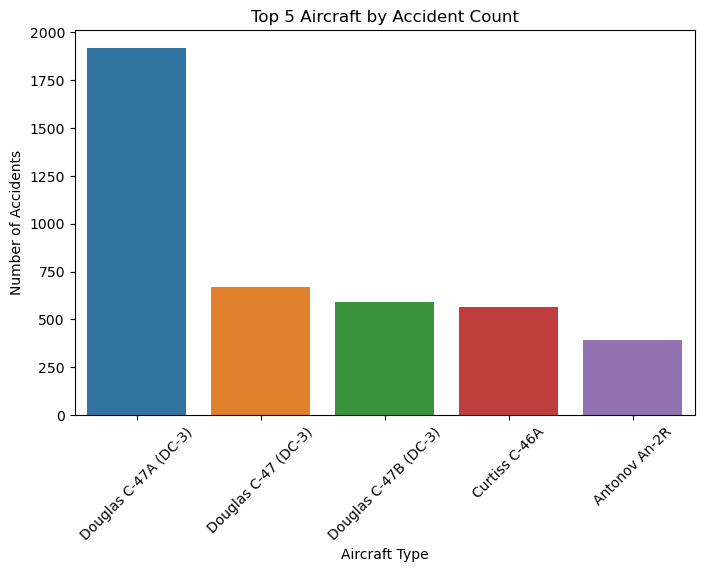

In [202]:
#Create a basic Seaborn bar plot
plt.figure(figsize=(8, 5))  # Set a simple size
sns.barplot(x=top_types.index, y=top_types.values) # To add colors
plt.xlabel("Aircraft Type")
plt.ylabel("Number of Accidents")
plt.title("Top 5 Aircraft by Accident Count")
plt.xticks(rotation=45)  # Rotate labels for readability
plt.show()

## Additional Visualization and Conclusion

I’ll add a simple line plot of accidents over time to complement our bar chart to achieve complete visualization. Then, I’ll conclude with a summary linking our analysis to the recommendations.

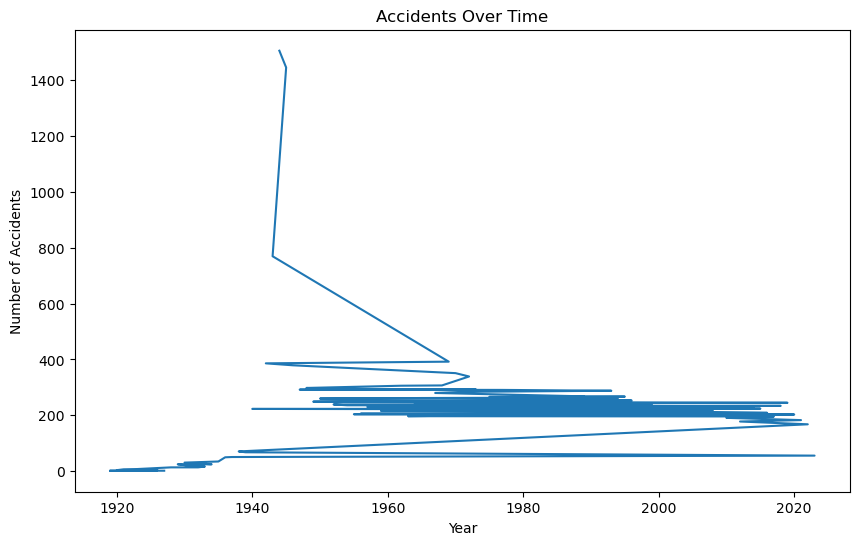

In [203]:
# Import library
import matplotlib.pyplot as plt

# Clean 'year' column safely and reassign
df_no_duplicates = df_no_duplicates.copy()  # Create a clean copy to avoid warnings
df_no_duplicates.loc[:, 'year'] = pd.to_numeric(df_no_duplicates['year'], errors='coerce')  # Force numeric, NaN for bad values
df_cleaned = df_no_duplicates.dropna(subset=['year'])  # Remove rows with NaN years

# Simple line plot
yearly_counts = df_cleaned['year'].value_counts()
plt.figure(figsize=(10, 6))
plt.plot(yearly_counts.index, yearly_counts.values)
plt.xlabel("Year")
plt.ylabel("Number of Accidents")
plt.title("Accidents Over Time")
plt.show()


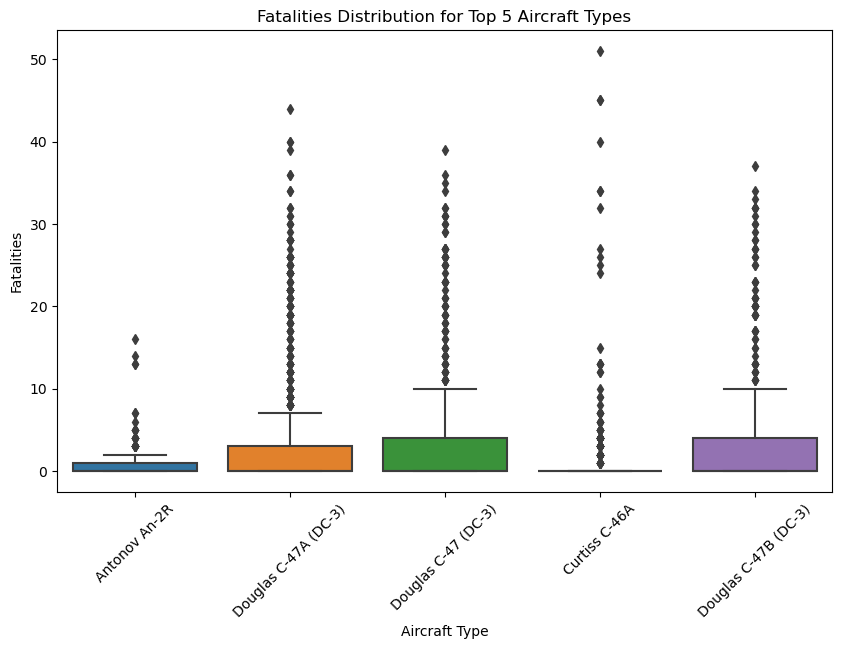

In [204]:
# Create a box plot for fatalities (limit to top types for clarity)
top_types = df_no_duplicates['type'].value_counts().head(5).index
plt.figure(figsize=(10, 6))
sns.boxplot(x='type', y='fatalities', data=df_no_duplicates[df_no_duplicates['type'].isin(top_types)])
plt.xlabel("Aircraft Type")
plt.ylabel("Fatalities")
plt.title("Fatalities Distribution for Top 5 Aircraft Types")
plt.xticks(rotation=45)
plt.show()

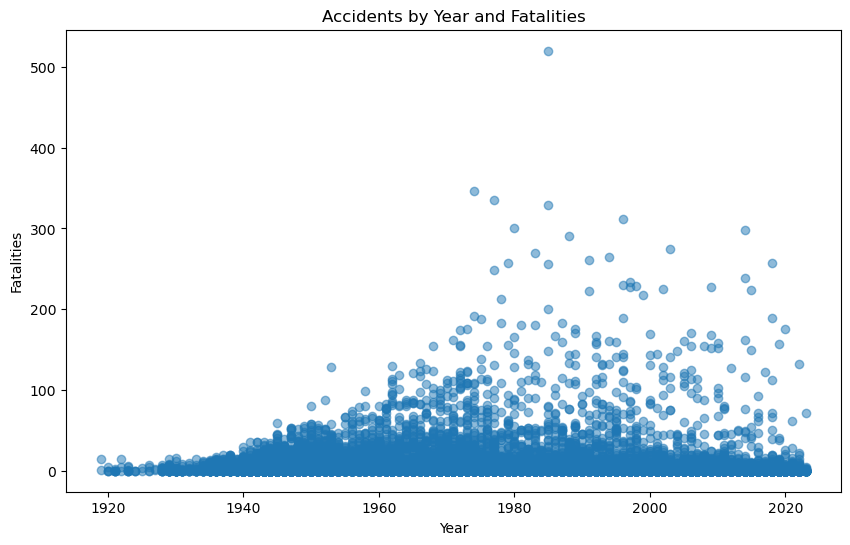

In [205]:
# Create a scatter plot for accidents by year and fatalities
plt.figure(figsize=(10, 6))
plt.scatter(df_no_duplicates['year'], df_no_duplicates['fatalities'], alpha=0.5)
plt.xlabel("Year")
plt.ylabel("Fatalities")
plt.title("Accidents by Year and Fatalities")
plt.show()

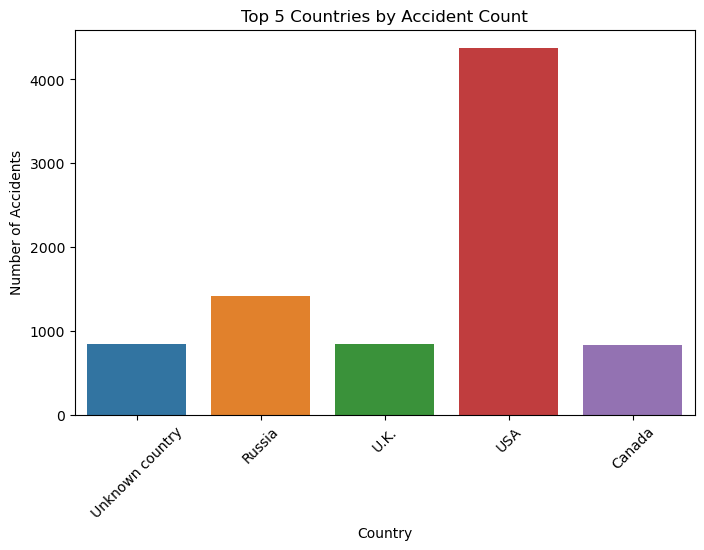

In [206]:
# Create a count plot for accidents by country (limit to top 5 for clarity)
top_countries = df_no_duplicates['country'].value_counts().head(5)
plt.figure(figsize=(8, 5))
sns.countplot(x='country', data=df_no_duplicates[df_no_duplicates['country'].isin(top_countries.index)])
plt.xlabel("Country")
plt.ylabel("Number of Accidents")
plt.title("Top 5 Countries by Accident Count")
plt.xticks(rotation=45)
plt.show()

## Final Commit 

Almost done. Need to save this progress though